# Exploratory Data Analysis (Análisis de Datos Exploratorio)

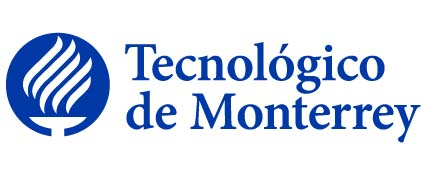

## TC4029 Ciencia y analítica de datos (Gpo 10)


### Armando Bringas Corpus (A01200230)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats

## 1. Lectura de los Datos

In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 2. Análisis de patrones de características individuales mediante visualización

### Entendiendo los tipos de variables en los datos

In [4]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


### Cálculo de las correlaciones entre variables

In [5]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [6]:
# Cálculando la correlación sólo en algunas varables específicas

df[['length', 'width', 'height', 'price']].corr()

,length,width,height,price
length,1.000000,0.857170,0.492063,0.690628
width,0.857170,1.000000,0.306002,0.751265
height,0.492063,0.306002,1.000000,0.135486
price,0.690628,0.751265,0.135486,1.000000


### Variables Numéricas Continuas

Pueden ser de tipo 'int64' o 'float64'

#### Relación Lineal

(0.0, 47865.483318411236)

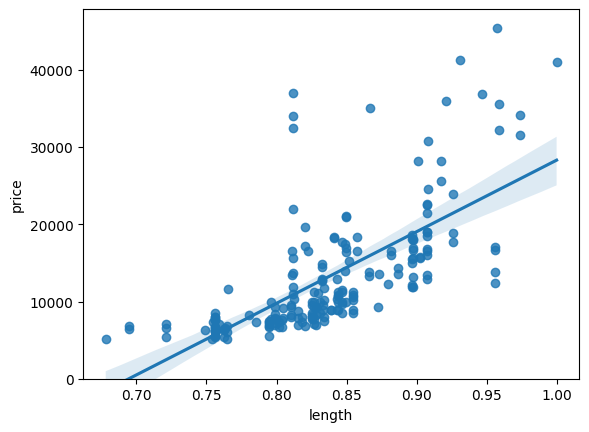

In [7]:
# teniendo a longitud como predictor del precio

sns.regplot(x="length", y="price", data=df)
plt.ylim(0,)

Se puede observar que a medidad que aumenta la longitud de igual manera sube el precio, ahora procederemos a examinar la correlación.

In [8]:
df[["length", "price"]].corr()

,length,price
length,1.000000,0.690628
price,0.690628,1.000000


La correlación entre la longitud y el precio es de aproximadamente 0.69

Ahora analizaremos un caso donde la correlación es negativa

(0.0, 48243.579349594154)

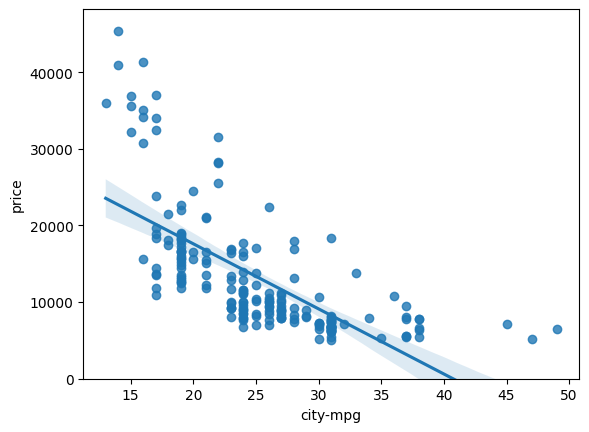

In [9]:
# teniendo a 'city-mpg' como predictor del precio

sns.regplot(x="city-mpg", y="price", data=df)
plt.ylim(0,)

In [10]:
df[["city-mpg", "price"]].corr()

,city-mpg,price
city-mpg,1.000000,-0.686571
price,-0.686571,1.000000


#### Relación Lineal Débil

<AxesSubplot: xlabel='stroke', ylabel='price'>

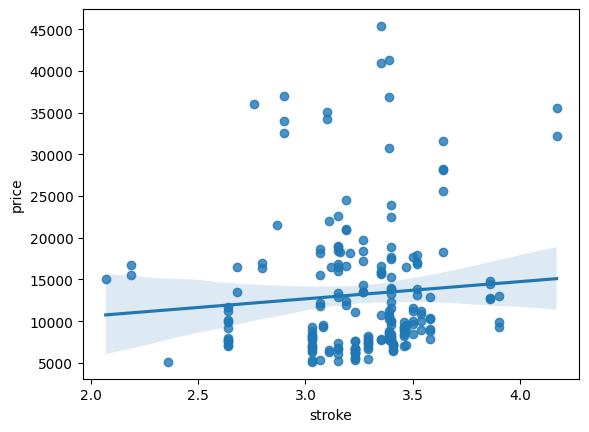

In [11]:
# teniendo a 'stroke' como predictor del precio

sns.regplot(x="stroke", y="price", data=df)

In [12]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


### Variables Categóricas

Pueden ser de tipo 'object' o 'int64'

En el siguiente ejemplo vamos a examinar 'make' con el precio

<AxesSubplot: xlabel='make', ylabel='price'>

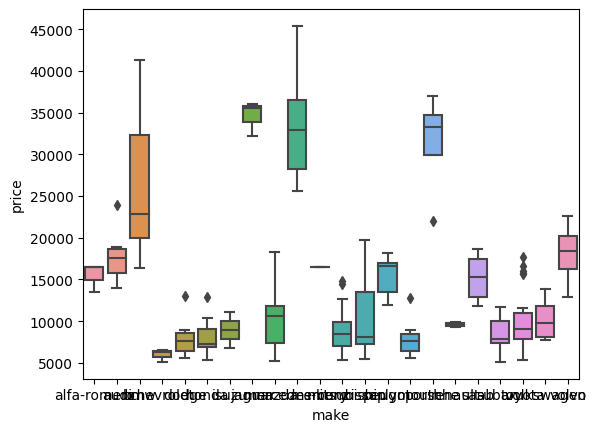

In [13]:
sns.boxplot(x="make", y="price", data=df)

Como podemos observar las distribuaciones de la variable 'make' tienen un empalme significativo, por lo que no es un bien preductor para el precio. Procederemos a probar con otra variable

<AxesSubplot: xlabel='aspiration', ylabel='price'>

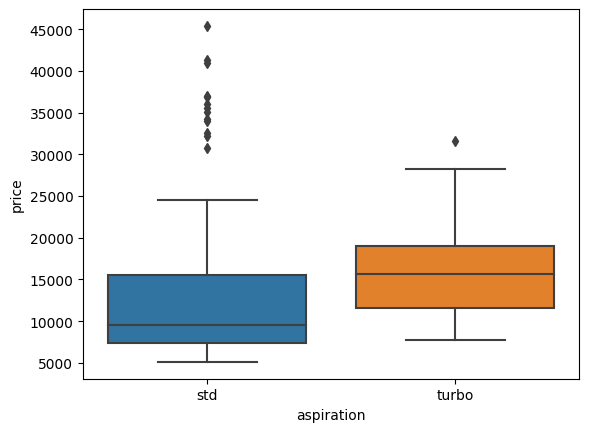

In [14]:
sns.boxplot(x="aspiration", y="price", data=df)

En este caso 'aspiration' podría ser un mejor predictor para el precio

## 3. Análisis de Estadística Descriptiva

In [15]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Para describir datos categóricos usamos en describe, include=['object']

In [16]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### Conteo de valores

In [17]:
# Conteo de cuantos valores por variable en 'make'

df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

Convertir las series en un dataframe

In [18]:
make_counts = df['make'].value_counts().to_frame()
make_counts.rename(columns={'make': 'value_counts'}, inplace=True)
make_counts

,value_counts
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11
dodge,9


In [19]:
# Nombrado de la columna make

make_counts.index.name = 'make'
make_counts

,value_counts
make,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11


## Fundamentos de Agrupación

In [20]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Creación de grupo

In [21]:
df_group = df[['make','body-style','price']]

Calculamos el promedio de precio para cada una de las categorías de los datos

In [22]:
df_group = df_group.groupby(['make'],as_index=False).mean()
df_group

,make,price
0,alfa-romero,15498.333333
1,audi,17859.166667
2,bmw,26118.750000
3,chevrolet,6007.000000
4,dodge,7875.444444
5,honda,8184.692308
6,isuzu,8916.500000
7,jaguar,34600.000000
8,mazda,10652.882353
9,mercedes-benz,33647.000000


Agrupación por múltiples variables

In [23]:
df_gptest = df[['make','body-style','price']]
grouped_test1 = df_gptest.groupby(['make','body-style'],as_index=False).mean()
grouped_test1

,make,body-style,price
0,alfa-romero,convertible,14997.500000
1,alfa-romero,hatchback,16500.000000
2,audi,sedan,17647.000000
3,audi,wagon,18920.000000
4,bmw,sedan,26118.750000
5,chevrolet,hatchback,5723.000000
6,chevrolet,sedan,6575.000000
7,dodge,hatchback,7819.800000
8,dodge,sedan,7619.666667
9,dodge,wagon,8921.000000


Creación de la 'Pivot table'

In [24]:
grouped_pivot = grouped_test1.pivot(index='make',columns='body-style')
grouped_pivot

price                                            \
body-style    convertible       hardtop     hatchback         sedan   
make                                                                  
alfa-romero       14997.5           NaN  16500.000000           NaN   
audi                  NaN           NaN           NaN  17647.000000   
bmw                   NaN           NaN           NaN  26118.750000   
chevrolet             NaN           NaN   5723.000000   6575.000000   
dodge                 NaN           NaN   7819.800000   7619.666667   
honda                 NaN           NaN   7054.428571   9945.000000   
isuzu                 NaN           NaN  11048.000000   6785.000000   
jaguar                NaN           NaN           NaN  34600.000000   
mazda                 NaN           NaN  10085.000000  11464.142857   
mercedes-benz     35056.0  36788.000000           NaN  33074.000000   
mercury               NaN           NaN  16503.000000           NaN   
mitsubishi            NaN           NaN   9597.888889   8434.000000   
nissan                NaN   8249.000000  14409.000000   8604.555556   
peugot                NaN           NaN           NaN  15758.571429   
plymouth              NaN           NaN   8130.500000   7150.500000   
porsche           37028.0  33278.000000  22018.000000           NaN   
renault               NaN           NaN   9895.000000           NaN   
saab                  NaN           NaN  15013.333333  15433.333333   
subaru                NaN           NaN   6591.333333   9070.600000   
toyota            17669.0   9762.333333   9616.000000   9542.200000   
volkswagen        11595.0           NaN   9980.000000   9673.888889   
volvo                 NaN           NaN           NaN  18726.875000   

                             
body-style            wagon  
make                         
alfa-romero             NaN  
audi           18920.000000  
bmw                     NaN  
chevrolet               NaN  
dodge           8921.000000  
honda           7295.000000  
isuzu                   NaN  
jaguar                  NaN  
mazda                   NaN  
mercedes-benz  28248.000000  
mercury                 NaN  
mitsubishi              NaN  
nissan          9915.666667  
peugot         15017.500000  
plymouth        8921.000000  
porsche                 NaN  
renault         9295.000000  
saab                    NaN  
subaru          9342.000000  
toyota          9836.000000  
volkswagen     12290.000000  
volvo          16293.333333

Llenado de valores NaN por ceros

In [25]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style    convertible       hardtop     hatchback         sedan   
make                                                                  
alfa-romero       14997.5      0.000000  16500.000000      0.000000   
audi                  0.0      0.000000      0.000000  17647.000000   
bmw                   0.0      0.000000      0.000000  26118.750000   
chevrolet             0.0      0.000000   5723.000000   6575.000000   
dodge                 0.0      0.000000   7819.800000   7619.666667   
honda                 0.0      0.000000   7054.428571   9945.000000   
isuzu                 0.0      0.000000  11048.000000   6785.000000   
jaguar                0.0      0.000000      0.000000  34600.000000   
mazda                 0.0      0.000000  10085.000000  11464.142857   
mercedes-benz     35056.0  36788.000000      0.000000  33074.000000   
mercury               0.0      0.000000  16503.000000      0.000000   
mitsubishi            0.0      0.000000   9597.888889   8434.000000   
nissan                0.0   8249.000000  14409.000000   8604.555556   
peugot                0.0      0.000000      0.000000  15758.571429   
plymouth              0.0      0.000000   8130.500000   7150.500000   
porsche           37028.0  33278.000000  22018.000000      0.000000   
renault               0.0      0.000000   9895.000000      0.000000   
saab                  0.0      0.000000  15013.333333  15433.333333   
subaru                0.0      0.000000   6591.333333   9070.600000   
toyota            17669.0   9762.333333   9616.000000   9542.200000   
volkswagen        11595.0      0.000000   9980.000000   9673.888889   
volvo                 0.0      0.000000      0.000000  18726.875000   

                             
body-style            wagon  
make                         
alfa-romero        0.000000  
audi           18920.000000  
bmw                0.000000  
chevrolet          0.000000  
dodge           8921.000000  
honda           7295.000000  
isuzu              0.000000  
jaguar             0.000000  
mazda              0.000000  
mercedes-benz  28248.000000  
mercury            0.000000  
mitsubishi         0.000000  
nissan          9915.666667  
peugot         15017.500000  
plymouth        8921.000000  
porsche            0.000000  
renault         9295.000000  
saab               0.000000  
subaru          9342.000000  
toyota          9836.000000  
volkswagen     12290.000000  
volvo          16293.333333

### Visualización de la relación entre variables

Utilizaremos un 'heat map' para ver la relación entre 'maker' contra precio

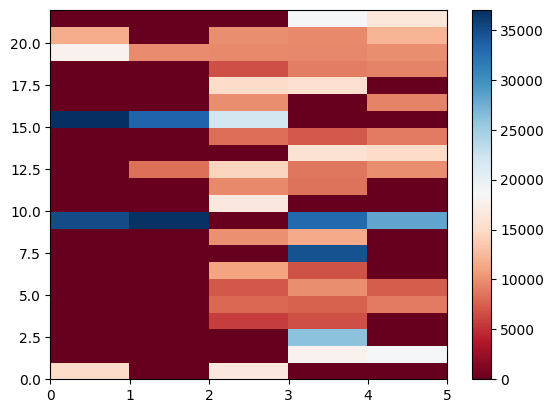

In [26]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

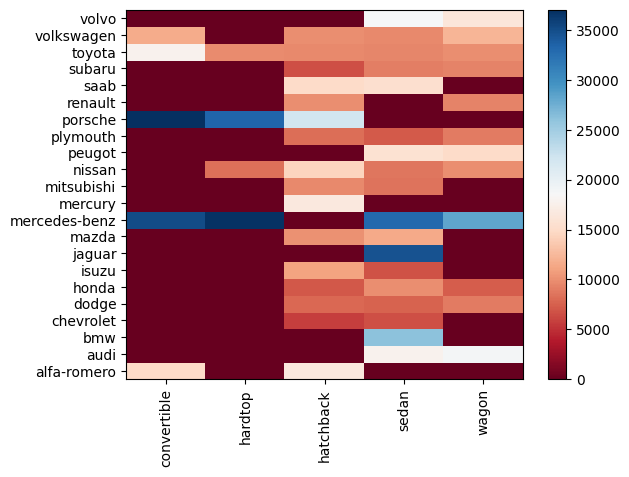

In [27]:
# Configuración del gráfico para hacerlo más entendible

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## 5. Correlación vs Causalidad

### Correlación de Pearson

* 1 Correlación lineal perfecta
* 0 No hay una correlación lineal
* -1 Correlación lineal negativa perfecta

In [28]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


### P-Value

* p-value < 0.001 evidencia fuerte de que la correlación es significativa.
* p-value < 0.05 evidencia moderada de que la correlación es significativa.
* p-value < 0.1 evidencia débil de que la correlación es significativa.
* p-value > 0.1 no hay evidencia de haya una correlación significativa

Por ejemplo 'Horsepower' contra el precio

In [29]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259557e-48


Por lo tanto, la correlación entre 'horsepower' y el precio es significativa

## 6. ANOVA: Análisis de Varianza

* **F-test**: que tan diferentes son los grupos, entre mayor sea la media la diferencia será mayor.
* **P-value**: que tan estadísticamente significativo es el valor calculado.

In [30]:
grouped_test2=df_gptest[['make', 'price']].groupby(['make'])
grouped_test2.head(2)

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
9,bmw,16430.0
10,bmw,16925.0
17,chevrolet,5151.0
18,chevrolet,6295.0
20,dodge,5572.0
21,dodge,6377.0


In [31]:
df_gptest

,make,body-style,price
0,alfa-romero,convertible,13495.0
1,alfa-romero,convertible,16500.0
2,alfa-romero,hatchback,16500.0
3,audi,sedan,13950.0
4,audi,sedan,17450.0
...,...,...,...
196,volvo,sedan,16845.0
197,volvo,sedan,19045.0
198,volvo,sedan,21485.0
199,volvo,sedan,22470.0


In [32]:
grouped_test2.get_group('volvo')['price']

190    12940.0
191    13415.0
192    15985.0
193    16515.0
194    18420.0
195    18950.0
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, dtype: float64

'One way' ANOVA

In [33]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('volvo')['price'], grouped_test2.get_group('volvo')['price'], grouped_test2.get_group('volvo')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.0 , P = 1.0


El resultado indica que no hay una correlación fuerte.